In [2]:
from google.colab import files

uploaded = files.upload()  # required file


Saving tic2.txt to tic2.txt


In [0]:
import pandas as pd

df = pd.read_csv("tic2.txt", encoding = "ISO-8859-1")  # Read CSV


In [6]:
df.isna().sum()

Number                0
Short description     1
Incident_Category     0
Repository            0
Environment          48
Business             48
dtype: int64

In [0]:
  ### TAKING CARE OF Missing files

t1 = df[["Short description"]]   #Major part of training
t2 = df[["Repository","Environment","Business"]]  # Other half of training
T = df[["Incident_Category"]] # Target

In [33]:
print(t2.Environment.unique())
print(t2.Business.unique()) 

['PROD' 'QA' 'DEV' nan]
['business3' 'business1' 'business6' 'business4' 'business7' 'business9'
 'business2' 'business5' nan 'Bisiness1' 'Bisiness7' 'Bisiness3'
 'Bisiness4' 'Bisiness2' 'Bisiness6' 'Bisiness9' 'Bisiness5' 'Bisiness8'
 'Shared Services']


In [0]:
t2 = t2.fillna(value={"Environment":"PROD","Business":"Shared Services"})

In [35]:
t2.isna().sum()

Repository     0
Environment    0
Business       0
dtype: int64

In [36]:
t1 = t1.fillna("No Descrpition")
t1.isna().sum()

Short description    0
dtype: int64

In [37]:
print(t2.Environment.unique())
print(t2.Business.unique()) 

['PROD' 'QA' 'DEV']
['business3' 'business1' 'business6' 'business4' 'business7' 'business9'
 'business2' 'business5' 'Shared Services' 'Bisiness1' 'Bisiness7'
 'Bisiness3' 'Bisiness4' 'Bisiness2' 'Bisiness6' 'Bisiness9' 'Bisiness5'
 'Bisiness8']


```

from collections import defaultdict
d = defaultdict(LabelEncoder)

#With this, you now retain all columns LabelEncoder as dictionary.


# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))
```

In [0]:
t2L = t2  ### copy of original dataset

```
>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])

```


In [14]:
## LabelEncode datasets ##

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)


#t2 = t2.apply(LabelEncoder().fit_transform)


,Repository,Environment,Business
0,TGT_INF_PRD,PROD,business3
1,Unknown,PROD,business1
2,Unknown,QA,business1
3,Unknown,PROD,business6
4,Unknown,QA,business1


In [191]:
# Encoding the variable
fit = t2L.apply(lambda x: d[x.name].fit_transform(x))   ####  This is used to fit_transfolm entire dataset

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x)) #### get back original classes of dataset

# Using the dictionary to label future data  #### transform classes again to Label numbers, use same one code for any future datasets
t2L = t2L.apply(lambda x: d[x.name].transform(x))
 


#OneHotEncoder().fit_transform(df)
print(t2L)

      Repository  Environment  Business
0             21            1        12
1             35            1        10
2             35            2        10
3             35            1        15
4             35            2        10
...          ...          ...       ...
2005          35            1         0
2006          35            2         2
2007          35            1         8
2008          22            2         2
2009          35            2         6

[2010 rows x 3 columns]


In [0]:
T1L = T   ### copy of original dataset

In [201]:
# Encoding the variable
#fit1 = T1L.apply(lambda x: d[x.name].fit_transform(x))   ####  This is used to fit_transfolm entire dataset

# Inverse the encoded
T1L = fit1.apply(lambda x: d[x.name].inverse_transform(x)) #### get back original classes of dataset

# Using the dictionary to label future data  #### transform classes again to Label numbers, use same one code for any future datasets
#T1L = T1L.apply(lambda x: d[x.name].transform(x))

print(T1L)

      Incident_Category
0                     6
1                     8
2                     4
3                     6
4                     8
...                 ...
2005                  8
2006                  6
2007                  6
2008                  1
2009                  8

[2010 rows x 1 columns]


In [48]:
# Natural Language Tool Kit 
import nltk 

nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
t1.columns ##### major column

Index(['Short description'], dtype='object')

In [66]:
t1['Short description'][0:10]    ## convert short description to vague words of what Issue is aboout

0                        uncompress the mentioned file
1     Informatica jobs failing - Database Driver Error
2          Automatic promotion from Dev --> QA Failing
3    Q3 2018- Quarterly System Access Review - Info...
4            Error faced while running load in QA env.
5                Please add my 2FA Id in folder  group
6                            PROD jobs slowness Issue-
7    Please create the folder structure as it is in...
8                         Workflow Scheduling in Prod.
9                                     Jobs terminated 
Name: Short description, dtype: object

In [67]:
print(corpus[0:10])

['uncompress mention file', 'informatica job fail databas driver error', 'automat promot fail', 'quarterli system access review informatica', 'error face run load', 'pleas folder group', 'prod job slow issu', 'pleas creat folder structur product', 'workflow schedul prod', 'job termin']


In [0]:
# library to clean data 
import re 


# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
 

def prepro(df, col_name, no_rows):

	corpus = []

# 1000 (reviews) rows to clean 
	for i in range(0, no_rows): 
	
	# column : "Review", row ith 
		review = re.sub('[^a-zA-Z]', ' ', df[col_name][i]) 
	
	# convert all cases to lower cases 
		review = review.lower() 
	
	# split to array(default delimiter is " ") 
		review = review.split() 
	
	# creating PorterStemmer object to 
	# take main stem of each word 
		ps = PorterStemmer() 
 

	
	# loop for stemming each word 
	# in string array at ith row	 
		review = [ps.stem(word) for word in review if not word in set(stopwords.words('english')) and len(word) > 3 ] 
				
	# rejoin all string array elements 
	# to create back into a string 
		review = ' '.join(review) 
	
	# append each string to create 
	# array of clean text 
		corpus.append(review) 
	
	return corpus




In [72]:
t1L = t1
t1L.head()

,Short description
0,uncompress the mentioned file
1,Informatica jobs failing - Database Driver Error
2,Automatic promotion from Dev --> QA Failing
3,Q3 2018- Quarterly System Access Review - Info...
4,Error faced while running load in QA env.


In [0]:
corpus = prepro(t1L,'Short description', 2010)

In [0]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable)  ### This creates a column for each word in corpus, the rows have number of times the word has occured in the short description
X = cv.fit_transform(corpus).toarray() 

# y contains target if short description belongs to one of the category 
y = T1L.iloc[:, 0].values 

In [76]:
print(type(X))

<class 'numpy.ndarray'>


In [0]:
ts1 = pd.DataFrame(data=X[:,:]) # This setp is still a in confusion, am not sure if it's necessary.

In [78]:
print(ts1)

      0     1     2     3     4     5     ...  1082  1083  1084  1085  1086  1087
0        0     0     0     0     0     0  ...     0     0     0     0     0     0
1        0     0     0     0     0     0  ...     0     0     0     0     0     0
2        0     0     0     0     0     0  ...     0     0     0     0     0     0
3        0     0     0     0     0     0  ...     0     0     0     0     0     0
4        0     0     0     0     0     0  ...     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
2005     0     0     0     0     0     0  ...     0     0     0     0     0     0
2006     0     0     0     0     0     0  ...     0     0     0     0     0     0
2007     0     0     0     0     0     0  ...     0     0     0     0     0     0
2008     0     0     0     0     0     0  ...     0     0     0     0     0     0
2009     0     0     0     0     0     0  ...     0     0     0     0     0     0

[2010 rows x 10

In [85]:
print(t2L)

      Repository  Environment  Business
0             21            1        12
1             35            1        10
2             35            2        10
3             35            1        15
4             35            2        10
...          ...          ...       ...
2005          35            1         0
2006          35            2         2
2007          35            1         8
2008          22            2         2
2009          35            2         6

[2010 rows x 3 columns]


In [0]:
ts2 = ts1.join(t2L)

In [99]:
print(T1L)   # This is Target classes

      Incident_Category
0                     6
1                     8
2                     4
3                     6
4                     8
...                 ...
2005                  8
2006                  6
2007                  6
2008                  1
2009                  8

[2010 rows x 1 columns]


In [100]:
print(ts2)  ##  This is training classes

      0  1  2  3  4  5  ...  1085  1086  1087  Repository  Environment  Business
0     0  0  0  0  0  0  ...     0     0     0          21            1        12
1     0  0  0  0  0  0  ...     0     0     0          35            1        10
2     0  0  0  0  0  0  ...     0     0     0          35            2        10
3     0  0  0  0  0  0  ...     0     0     0          35            1        15
4     0  0  0  0  0  0  ...     0     0     0          35            2        10
...  .. .. .. .. .. ..  ...   ...   ...   ...         ...          ...       ...
2005  0  0  0  0  0  0  ...     0     0     0          35            1         0
2006  0  0  0  0  0  0  ...     0     0     0          35            2         2
2007  0  0  0  0  0  0  ...     0     0     0          35            1         8
2008  0  0  0  0  0  0  ...     0     0     0          22            2         2
2009  0  0  0  0  0  0  ...     0     0     0          35            2         6

[2010 rows x 1091 columns]


In [0]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.model_selection import train_test_split 

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(ts2, T1L, test_size = 0.25)

In [102]:
print(T1L.Incident_Category.unique())  # not sure about which label corresponds to which class, need to decode again using le.  inverse_transform

[6 8 4 1 7 3 0 2 5 9]


In [103]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy') 
							
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 
print(len(X_test))
print(len(y_pred))
y_pred

503
503


array([6, 6, 8, 8, 8, 6, 6, 1, 6, 6, 8, 6, 8, 4, 6, 6, 6, 8, 3, 8, 6, 6,
       4, 1, 6, 6, 6, 8, 7, 6, 7, 8, 8, 6, 8, 6, 8, 6, 8, 1, 8, 1, 8, 1,
       6, 6, 6, 6, 6, 6, 6, 1, 4, 6, 1, 8, 6, 6, 6, 8, 8, 6, 6, 8, 6, 6,
       1, 8, 6, 8, 6, 6, 8, 8, 6, 8, 6, 6, 6, 8, 8, 6, 8, 6, 1, 4, 8, 6,
       8, 8, 6, 8, 4, 6, 1, 8, 8, 8, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 8, 6,
       8, 4, 6, 8, 8, 6, 8, 8, 6, 8, 8, 8, 1, 1, 8, 8, 8, 5, 6, 7, 3, 1,
       7, 6, 6, 8, 6, 6, 1, 7, 8, 6, 6, 1, 6, 6, 6, 8, 8, 8, 8, 4, 5, 6,
       8, 6, 6, 1, 6, 8, 6, 6, 6, 8, 8, 8, 8, 6, 7, 6, 8, 8, 1, 8, 8, 8,
       6, 7, 6, 4, 8, 8, 6, 8, 8, 6, 1, 1, 6, 1, 6, 8, 6, 6, 8, 1, 7, 4,
       6, 6, 6, 8, 6, 6, 8, 1, 6, 6, 6, 6, 6, 8, 8, 8, 8, 6, 6, 6, 8, 1,
       8, 4, 8, 8, 8, 6, 1, 6, 8, 6, 6, 8, 6, 8, 6, 6, 7, 6, 6, 8, 7, 6,
       8, 8, 4, 8, 6, 6, 6, 6, 6, 8, 8, 8, 8, 4, 6, 6, 1, 1, 8, 8, 6, 8,
       1, 8, 6, 6, 6, 8, 4, 6, 6, 8, 8, 8, 6, 6, 7, 6, 8, 8, 8, 8, 8, 1,
       8, 1, 6, 1, 4, 6, 1, 8, 8, 6, 8, 6, 8, 7, 6,

In [195]:
p2 = pd.DataFrame(y_pred)

incidents = fit1.apply(lambda x: d[x.name].inverse_transform(p2))
print(incidents)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [108]:
# Making the Confusion Matrix 
from sklearn.metrics import multilabel_confusion_matrix 

cm = multilabel_confusion_matrix(y_test, y_pred) ##  Confusion Matrix is not needed for multi class classification
print(cm)

from sklearn.metrics import accuracy_score

acc_NLPmodel = accuracy_score(y_test,y_pred)
print(acc_NLPmodel)

[[[502   0]
  [  1   0]]

 [[438  13]
  [ 13  39]]

 [[496   1]
  [  6   0]]

 [[496   0]
  [  5   2]]

 [[482   6]
  [  2  13]]

 [[498   0]
  [  2   3]]

 [[257  54]
  [ 30 162]]

 [[475   3]
  [  8  17]]

 [[276  33]
  [ 38 156]]

 [[497   0]
  [  5   1]]]
0.7813121272365805


In [110]:
import numpy as np
ps1 = np.array(ts2.loc[286,:]).reshape(-1,1091)
print(ps1)    ### sample input array to prediction model

[[ 0  0  0 ... 35  1  3]]


In [111]:
y1 = model.predict(ps1)
print(y1)  ## predicted class category

[6]


In [0]:
###################### END of RAndomForest  ####################

In [127]:
########################## KMeans ##################### just out of curiocity


from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=9)

kmeans_cluster = kmeans_cluster.fit(X_train) 

kmeans_cluster.predict(X_test)

array([8, 2, 3, 0, 1, 2, 5, 0, 5, 1, 1, 0, 4, 0, 0, 8, 2, 4, 2, 0, 5, 1,
       3, 0, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 5, 1, 5, 6, 0, 0, 4, 0, 2, 2,
       1, 1, 1, 2, 6, 2, 2, 2, 0, 0, 5, 0, 0, 1, 6, 2, 2, 2, 2, 2, 4, 5,
       0, 5, 5, 0, 1, 0, 5, 4, 0, 0, 3, 5, 2, 2, 0, 2, 6, 6, 4, 2, 2, 2,
       0, 5, 5, 0, 0, 2, 0, 5, 1, 0, 0, 0, 5, 0, 0, 2, 2, 2, 6, 4, 1, 1,
       4, 5, 2, 2, 0, 0, 2, 5, 5, 0, 1, 5, 2, 5, 2, 1, 2, 2, 3, 8, 2, 4,
       3, 2, 2, 0, 6, 2, 0, 2, 2, 2, 0, 2, 5, 5, 8, 4, 5, 2, 2, 2, 2, 0,
       0, 2, 4, 3, 2, 0, 2, 2, 5, 6, 0, 1, 2, 5, 5, 1, 0, 2, 5, 5, 2, 3,
       2, 5, 2, 2, 3, 5, 1, 5, 0, 0, 4, 1, 6, 2, 2, 2, 1, 8, 2, 4, 3, 0,
       4, 0, 2, 2, 8, 2, 0, 5, 4, 2, 1, 4, 2, 2, 2, 2, 2, 2, 5, 0, 2, 2,
       4, 6, 8, 5, 5, 8, 0, 2, 0, 1, 5, 2, 2, 1, 3, 0, 1, 0, 5, 3, 0, 2,
       0, 5, 5, 4, 1, 1, 5, 2, 5, 1, 5, 2, 5, 5, 1, 0, 5, 2, 1, 0, 2, 5,
       2, 2, 3, 1, 2, 0, 0, 2, 3, 5, 0, 2, 1, 1, 2, 2, 1, 2, 5, 1, 5, 0,
       0, 4, 2, 2, 3, 5, 3, 5, 5, 2, 0, 2, 2, 0, 3,

In [123]:
from sklearn import metrics

print(metrics.homogeneity_score(kmeans_cluster.predict(X_test), y_test.Incident_Category.values))

0.048105336448890194


In [184]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      0  1  2  3  4  5  ...  1085  1086  1087  Repository  Environment  Business
875   0  0  0  0  0  0  ...     0     0     0           3            1         0
857   0  0  0  0  0  0  ...     0     0     0          35            2         6
240   0  0  0  0  0  0  ...     0     0     0          35            1         3
1734  0  0  0  0  0  0  ...     0     0     0           3            1         0
1     0  0  0  0  0  0  ...     0     0     0          35            1        10
...  .. .. .. .. .. ..  ...   ...   ...   ...         ...          ...       ...
1392  0  0  0  0  0  0  ...     0     0     0          35            1         9
1413  0  0  0  0  0  0  ...     0     0     0          35            0         0
954   0  0  0  0  0  0  ...     0     0     0          35            1         0
1637  0  0  1  0  0  0  ...     0     0     0          35            1         2
1104  0  0  0  0  0  0  ...     0     0     0          35            1         0

[1507 rows x 1091 columns]


In [144]:
clT = ts2.join(T1L)
print(clT.head)
print(clT.Incident_Category)

<bound method NDFrame.head of       0  1  2  3  4  ...  1087  Repository  Environment  Business  Incident_Category
0     0  0  0  0  0  ...     0          21            1        12                  6
1     0  0  0  0  0  ...     0          35            1        10                  8
2     0  0  0  0  0  ...     0          35            2        10                  4
3     0  0  0  0  0  ...     0          35            1        15                  6
4     0  0  0  0  0  ...     0          35            2        10                  8
...  .. .. .. .. ..  ...   ...         ...          ...       ...                ...
2005  0  0  0  0  0  ...     0          35            1         0                  8
2006  0  0  0  0  0  ...     0          35            2         2                  6
2007  0  0  0  0  0  ...     0          35            1         8                  6
2008  0  0  0  0  0  ...     0          22            2         2                  1
2009  0  0  0  0  0  ...     0     

In [160]:

kmeans = KMeans(n_clusters=9)

kmeans = kmeans_cluster.fit(ts2) 

kmeans.predict(X_test)

array([4, 5, 2, 1, 8, 3, 7, 1, 7, 8, 8, 1, 6, 1, 1, 2, 3, 6, 3, 1, 7, 0,
       2, 1, 3, 1, 8, 3, 3, 2, 3, 1, 5, 1, 7, 0, 7, 4, 1, 1, 6, 1, 3, 5,
       0, 8, 0, 5, 4, 3, 3, 3, 1, 1, 7, 1, 1, 0, 4, 3, 3, 3, 5, 3, 6, 7,
       1, 7, 7, 1, 8, 1, 7, 6, 1, 1, 2, 7, 5, 3, 1, 3, 4, 4, 6, 3, 3, 3,
       1, 7, 7, 1, 1, 3, 1, 7, 8, 1, 1, 1, 7, 1, 1, 5, 3, 3, 4, 6, 0, 0,
       6, 7, 3, 3, 1, 1, 3, 7, 7, 1, 0, 7, 5, 7, 5, 8, 3, 3, 2, 2, 3, 6,
       2, 5, 5, 1, 4, 3, 1, 3, 5, 3, 1, 5, 7, 7, 2, 6, 7, 3, 3, 3, 3, 1,
       1, 3, 6, 2, 3, 1, 3, 3, 7, 4, 1, 8, 5, 7, 7, 0, 1, 3, 7, 7, 3, 2,
       3, 7, 5, 3, 2, 7, 8, 7, 1, 1, 6, 0, 4, 5, 3, 3, 8, 2, 3, 6, 2, 1,
       6, 1, 3, 3, 4, 3, 1, 7, 6, 5, 8, 6, 5, 5, 3, 3, 3, 3, 7, 1, 5, 5,
       6, 4, 4, 7, 7, 2, 1, 5, 1, 0, 7, 3, 5, 0, 2, 1, 0, 1, 7, 2, 1, 3,
       1, 7, 7, 6, 8, 0, 7, 5, 7, 0, 7, 5, 7, 7, 8, 1, 7, 3, 0, 1, 5, 7,
       3, 3, 2, 0, 3, 1, 1, 3, 2, 7, 1, 3, 8, 0, 3, 3, 0, 5, 7, 0, 7, 1,
       1, 6, 5, 5, 2, 7, 2, 7, 7, 3, 1, 5, 3, 1, 2,

In [161]:
print(metrics.homogeneity_score(kmeans.predict(X_test), y_test.Incident_Category.values))

0.0486883784185156


In [0]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=9)

kmeans = kmeans.fit(clT) 

y_means = kmeans.predict(clT)


centers = kmeans.cluster_centers_

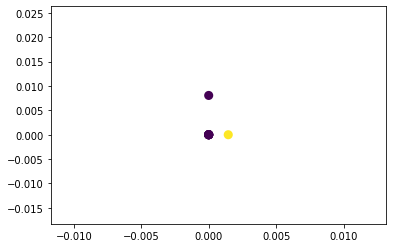

In [170]:
plt.scatter(centers[:,0], centers[:,1],  marker='.', s=200, linewidths=2, c=centers[:,0])

In [0]:
#####  STill working on this    --  Multi-variable Scatter plot is hard ###

plt.scatter(x,y, marker="^",color="purple")  # ^ for triangle, s for square
plt.scatter(x,z, marker="s",color="red")
plt.title("Title of plot or graph")
plt.xlabel("x axis name")
plt.ylabel("y axis name")


In [0]:
#######################  Rest of of function can be performed by simple if, else statements but they require api acess to service now ##########
import pysnow

username = "Dhairyashil.Deshpand"
password = "ceveo1234"
instance = "cenveo"



# Create client object
c = pysnow.Client(instance=instance, user=username, password=password)

# Define a resource, here we'll use the incident table API
incident = c.resource(api_path='/table/incident')

# Query for incidents with state 3
response = incident.get(query={'number': 'INC0151085'})

# Print out the first match
print(response.one_or_none())


######### There's a way to retrieve short description and other categorical parameters of that I don't know how to retrieve ######

#Pseudo Code ##


## Retrive the short description and store it in a variable

# convert short description string to array of words by applying prepro funciton and CountVectorizing the string


# input the countVectorizing array as input to prediction model along with other three paramerters


# Depending on output of prediction perform the respective action on the Ticket


# TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT ere it is!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


### Various modules like psnow, subprocess, pyzmail, twillio are available which can dp the jobs after correct category is predicted.



if y_pred == "Code_Migration":
  command. execfile('file.py')    #Trigger a dummy script and return status as success / failure

elif y_pred == "Code_Migration_Issues":
 pyzmail.connect(instance, username, password) .... 
      #Trigger a mail with SOP as dummy attachment

elif y_pred = SFTP_Issue   #Troubleshooting Trigger a mail to ask for session log 
      #Further check if keys to be shared then trigger a mail with dummy attachment
elif y_pred = Client_Tool_Issue:
     #Trigger a mail with dummy attachment
elif y_pred =  Env_Issue:
      # Trigger a dummy script and return status as success / failure
elif y_pred =  = Others Cluster:
  # these tickets in 5 categories (unsupervised learning)
elif y_pred = User_Request:
  # Cluster these tickets in 3 categories (unsupervised learning)
elif y_pred =  Access_Issues:
  # Trigger a mail with SOP as dummy attachment


